In [2]:
import subprocess
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils as ut

system_name = 'kite2d'
run_name = 'nac'
source_dir = '../data/'+system_name+'/'+run_name+'/'
data_dir = '../data/'+system_name+'/'+run_name+'_eval/'
plot_dir = '../plots/'+system_name+'/'+run_name+'/'

### Evaluate the environment contained in the source_dir with the best policy already obtained by the training

In [3]:
# ENVIRONMENT PARAMETERS
env_params = ut.read_params(source_dir+'param_env.txt')

In [4]:
# WRITING THE EVALUATION PARAMETERS
params = dict()
params['alg_type'] = 'eval'
params['policy_path'] = source_dir+'/best_policy.txt'
params['ev_time'] = 500 # sec
params['n_steps'] = params['ev_time']/float(env_params['decision_time'])
params['traj_points'] = 1000
params['gamma'] = 1
ut.write_params(params, data_dir, 'param_alg.txt')
ut.write_params(env_params, data_dir, 'param_env.txt')

In [5]:
# RUNNING THE EVALUATION
p = subprocess.Popen(["./run.exe", system_name, run_name+'_eval'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(p.stderr.read().decode('utf-8'))

In [6]:
# READING THE TRAJECTORIES
s_traj, s_labels = ut.read_traj(data_dir+'ev_states.txt')
aux_m, aux_l = ut.read_traj(data_dir+'return_traj.txt')
returns = aux_m[:,0]
ep_length = aux_m[:,1]

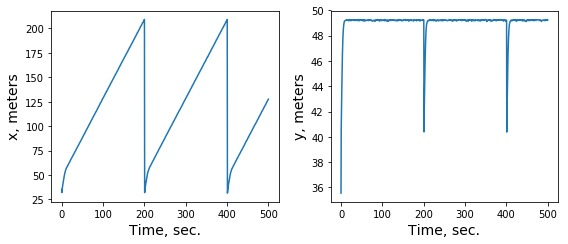

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3.5))

ax1.set_xlabel('Time, sec.', fontsize=14)
ax1.set_ylabel('x, meters', fontsize=14)
xs = np.linspace(0,params['ev_time'],params['traj_points'])
ax1.plot(xs, s_traj[:,0])

ax2.set_xlabel('Time, sec.', fontsize=14)
ax2.set_ylabel('y, meters', fontsize=14)
ax2.plot(xs, s_traj[:,1])

plt.tight_layout()
plt.savefig(plot_dir+'traj.png', dpi=200)